In [ ]:
!pip install -q tensorflow pandas numpy scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
df = pd.read_csv('/content/Features_combined.csv')

X = df.drop(columns=['Label', 'File_Name']).values
y = df['Label'].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(13, 3)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(units=128))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 11, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 11, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,228 (422.77 KB)

 Trainable params: 108,100 (422.27 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4873 - loss: 1.0506 - val_accuracy: 0.5936 - val_loss: 0.8581
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5786 - loss: 0.8486 - val_accuracy: 0.6501 - val_loss: 0.7529
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6414 - loss: 0.7671 - val_accuracy: 0.6921 - val_loss: 0.7013
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6681 - loss: 0.7235 - val_accuracy: 0.6913 - val_loss: 0.6752
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6865 - loss: 0.6883 - val_accuracy: 0.7225 - val_loss: 0.6473
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7012 - loss: 0.6695 - val_accuracy: 0.7316 - val_loss: 0.6183
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7143 - loss: 0.6458 - val_accuracy: 0.7179 - val_loss: 0.6311
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7225 - loss: 0.6330 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8079 - loss: 0.5627
Test Accuracy: 0.8109


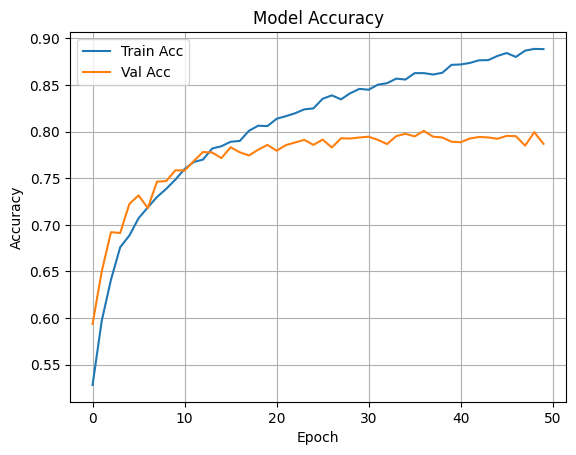

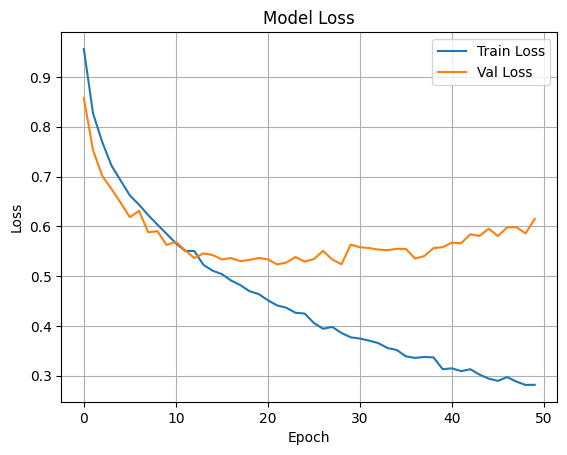

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
